In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 31s 0us/step


In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [6]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


1563/1563 [==============================] - 47s 29ms/step - loss: 1.5258 - accuracy: 0.4410 - val_loss: 1.3094 - val_accuracy: 0.5420
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1800 - accuracy: 0.5822 - val_loss: 1.1424 - val_accuracy: 0.5910
Epoch 3/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.0336 - accuracy: 0.6356 - val_loss: 1.1050 - val_accuracy: 0.6110
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9346 - accuracy: 0.6717 - val_loss: 1.0224 - val_accuracy: 0.6441
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8625 - accuracy: 0.6977 - val_loss: 0.9472 - val_accuracy: 0.6717
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8081 - accuracy: 0.7152 - val_loss: 0.9029 - val_accuracy: 0.6863
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.7563 - accuracy: 0.7347 - val_loss: 0.9181

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 3s - loss: 0.8774 - accuracy: 0.7042 - 3s/epoch - 10ms/step
Test accuracy: 0.704200029373169


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left")
plt.show()

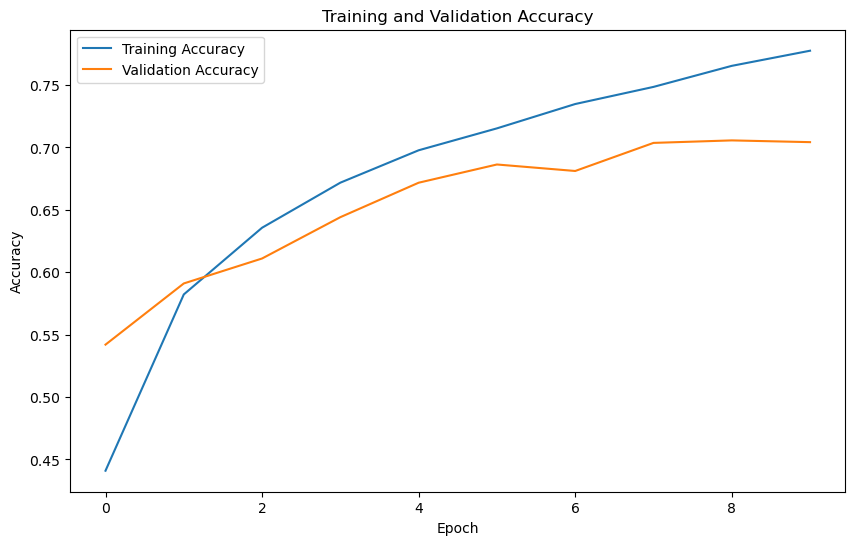

In [8]:
# Visualize training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [10]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 [==============================] - 3s 10ms/step - loss: 0.8774 - accuracy: 0.7042
Test Loss: 0.8773748874664307
Test Accuracy: 0.704200029373169


1/1 [==============================] - 0s 37ms/step


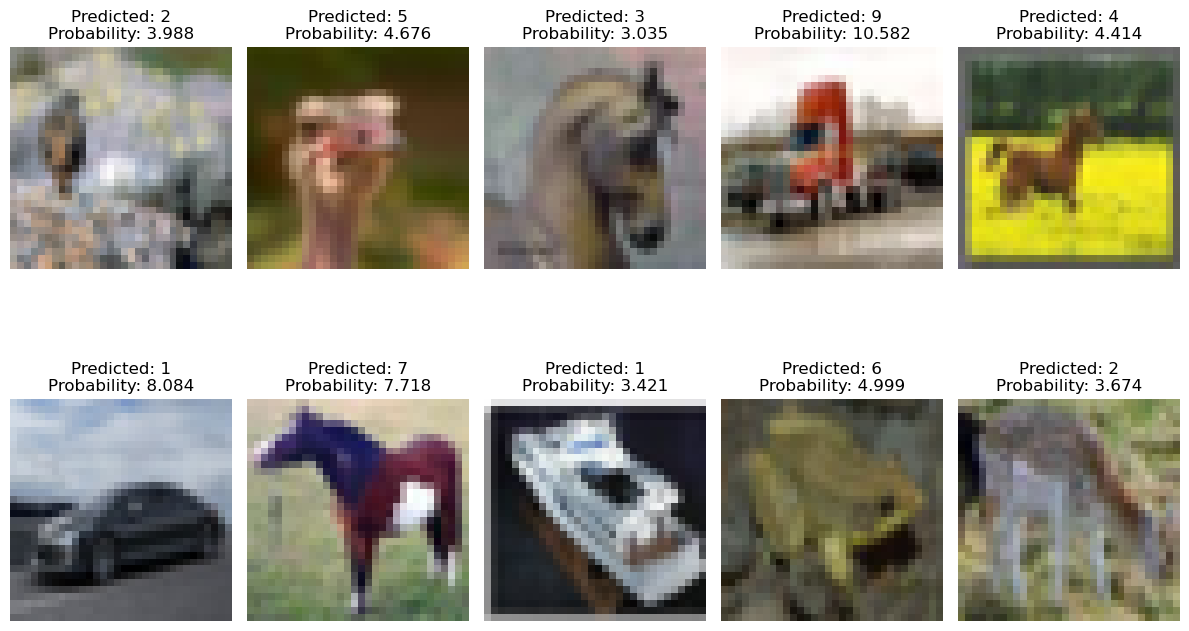

In [22]:

# Sample Predictions
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    rand_index = np.random.randint(0, len(test_images))
    pred_probs = model.predict(test_images[rand_index].reshape(1, 32, 32, 3))
    pred_label = np.argmax(pred_probs)
    plt.imshow(test_images[rand_index])
    plt.title(f'Predicted: {pred_label}\nProbability: {pred_probs[0][pred_label]:.3f}')
    plt.axis('off')
plt.tight_layout()
plt.show()
